# Animal Crossing New Horizons Catalog 

### By Ampiiere AKA Ampi

-------------------------------------------------------------------------------------

In [312]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # data visualization
import matplotlib.pyplot as plt

In [313]:
import os
input_path = r'C:\Users\sgunt\OneDrive\Desktop\animal_crossing\kaggle\input'

"""
for dirname, _, filenames in os.walk(input_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""

'\nfor dirname, _, filenames in os.walk(input_path):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n'

## Data Initialization and Cleanup

-------------------------------------------------------------------------------------

In [314]:
vlgr_path = os.path.join(input_path, r"animal-crossing-new-horizons-nookplaza-dataset\villagers.csv")
popul_path = os.path.join(input_path, r"acnh-villager-popularity\acnh_villager_data.csv")

vlgr_df = pd.read_csv(vlgr_path)
popul_df = pd.read_csv(popul_path)

In [315]:
vlgr_df.head()

,Name,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID
0,Admiral,Bird,Male,Cranky,Nature,27-Jan,aye aye,Steep Hill,Cool,Cool,Black,Blue,dirt-clod wall,tatami,717;1849;7047;2736;787;5970;3449;3622;3802;410...,brd06,B3RyfNEqwGmcccRC3
1,Agent S,Squirrel,Female,Peppy,Fitness,2-Jul,sidekick,Go K.K. Rider,Active,Simple,Blue,Black,concrete wall,colorful tile flooring,7845;7150;3468;4080;290;3971;3449;1708;4756;25...,squ05,SGMdki6dzpDZyXAw5
2,Agnes,Pig,Female,Big Sister,Play,21-Apr,snuffle,K.K. House,Simple,Elegant,Pink,White,gray molded-panel wall,arabesque flooring,4129;7236;7235;7802;896;3428;4027;7325;3958;71...,pig17,jzWCiDPm9MqtCfecP
3,Al,Gorilla,Male,Lazy,Fitness,18-Oct,ayyyeee,Go K.K. Rider,Active,Active,Red,White,concrete wall,green rubber flooring,1452;4078;4013;833;4116;3697;7845;3307;3946;39...,gor08,LBifxETQJGEaLhBjC
4,Alfonso,Alligator,Male,Lazy,Play,9-Jun,it'sa me,Forest Life,Simple,Simple,Red,Blue,yellow playroom wall,green honeycomb tile,4763;3205;3701;1557;3623;85;3208;3584;4761;121...,crd00,REpd8KxB8p9aGBRSE


In [316]:
popul_df.head()

,tier,rank,name
0,1,1,Raymond
1,1,2,Marshal
2,1,3,Shino
3,1,4,Sherb
4,1,5,Sasha


### 1.Check for Null

In [317]:
popul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tier    413 non-null    int64 
 1   rank    413 non-null    int64 
 2   name    413 non-null    object
dtypes: int64(2), object(1)
memory usage: 9.8+ KB


In [318]:
vlgr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             391 non-null    object
 1   Species          391 non-null    object
 2   Gender           391 non-null    object
 3   Personality      391 non-null    object
 4   Hobby            391 non-null    object
 5   Birthday         391 non-null    object
 6   Catchphrase      391 non-null    object
 7   Favorite Song    391 non-null    object
 8   Style 1          391 non-null    object
 9   Style 2          391 non-null    object
 10  Color 1          391 non-null    object
 11  Color 2          391 non-null    object
 12  Wallpaper        391 non-null    object
 13  Flooring         391 non-null    object
 14  Furniture List   391 non-null    object
 15  Filename         391 non-null    object
 16  Unique Entry ID  391 non-null    object
dtypes: object(17)
memory usage: 52.1+ K

### 2. Check Mismatch Names

In [319]:
popul_df["name"].isin(vlgr_df["Name"]).sum()

386

In [320]:
vlgr_df["Name"][vlgr_df["Name"].isin(popul_df["name"]) == False]

60         Buck
253      O'Hare
299       Renée
338       Spork
381    Wart Jr.
Name: Name, dtype: object

In [321]:
mismatch_names = popul_df["name"][popul_df["name"].isin(vlgr_df["Name"]) == False]

In [322]:
#vlgr.df does not contain these names...we drop them later from popul_df
mismatch_names

2               Shino
4               Sasha
5                Ione
25         Cephalobot
57             Étoile
84          Tiansheng
105             Petri
108             Quinn
114             Marlo
116              Chai
146            Azalea
158             Faith
170          Chabwick
202            WartJr
212               Rio
216       Buck(Brows)
222             Renee
224           Chelsea
226             Marty
229           Roswell
261               Zoe
287             OHare
300    Crackle(Spork)
323               Ace
328              Toby
341             Frett
399             Rilla
Name: name, dtype: object

In [323]:
#We see mismatching names from vlgr and popul
vlgr_df["Name"][vlgr_df["Name"].isin(popul_df["name"]) == False]

60         Buck
253      O'Hare
299       Renée
338       Spork
381    Wart Jr.
Name: Name, dtype: object

In [324]:
#Correcting the 5 names in popul
popul_df['name'] = popul_df['name'].replace(['Buck(Brows)'],'Buck')
popul_df['name'] = popul_df['name'].replace(['OHare'],'O\'Hare')
popul_df['name'] = popul_df['name'].replace(['Renee'],'Renée')
popul_df['name'] = popul_df['name'].replace(['Crackle(Spork)'],'Spork')
popul_df['name'] = popul_df['name'].replace(['WartJr'],'Wart Jr.')

In [325]:
popul_df.iloc[216]

tier       5
rank      87
name    Buck
Name: 216, dtype: object

In [326]:
#Drop all entries from popul not found in vlgr
popul_df = popul_df.drop(popul_df['name'][popul_df['name'].isin(vlgr_df['Name']) == False].index)

### 3. Merge Dataframes

In [327]:
#Check both df's contain same entries
popul_df['name'].isin(vlgr_df['Name']).sum()


391

In [328]:
#dfs are same length, set_index to name
popul_df.set_index('name', drop=True,inplace=True)
vlgr_df.set_index('Name', drop=True,inplace=True)

In [329]:
combined_df = popul_df.merge(vlgr_df, left_index=True,right_index=True)
combined_df

,tier,rank,Species,Gender,Personality,Hobby,Birthday,Catchphrase,Favorite Song,Style 1,Style 2,Color 1,Color 2,Wallpaper,Flooring,Furniture List,Filename,Unique Entry ID
Raymond,1,1,Cat,Male,Smug,Nature,1-Oct,crisp,K.K. Cruisin',Elegant,Cool,Black,Gray,office wall,monochromatic tile flooring,840;4116;1750;3590;1232;832;3560;839;3784;1744...,cat23,2nbzgWsuDBSN2LeEj
Marshal,1,2,Squirrel,Male,Smug,Music,29-Sep,sulky,K.K. Bossa,Elegant,Cool,Light blue,Blue,blue delicate-blooms wall,modern wood flooring,2554;1081;3681;9766;1161;3615;1845;8394;3271;3...,squ17,ZZJJbE5zFrcDXfLEF
Sherb,1,4,Goat,Male,Lazy,Nature,18-Jan,bawwww,Hypno K.K.,Simple,Cute,Gray,Blue,purple desert-tile wall,simple purple flooring,3995;4002;7133;3998;3624;3997;4000;4003;4111,goa09,XaaDkAfHynrEY2YS4
Ankha,1,7,Cat,Female,Snooty,Nature,22-Sep,me meow,K.K. Bazaar,Gorgeous,Simple,Colorful,Brown,ancient wall,pyramid tile,3472;8608;5165;8825;3774;8825;8825;3065;3810,cat19,AWdRRws22EGTxC7vc
Zucker,1,8,Octopus,Male,Lazy,Nature,8-Mar,bloop,Spring Blossoms,Simple,Cute,Blue,Yellow,chain-link fence,backyard lawn,4042;4412;7526;4077;4077;3064;4077;3946;3617;3...,ocp02,2F5tipHqgmWvWXTLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rocco,6,159,Hippo,Male,Cranky,Education,18-Aug,hippie,K.K. Lament,Simple,Cool,Yellow,Black,construction-site wall,construction-site flooring,7229;9568;9619;9619;8575;2553;2553;1567;3943;1...,hip00,vfET6L7B9ruRApyMb
Bettina,6,160,Mouse,Female,Normal,Education,12-Jun,eekers,Animal City,Simple,Elegant,White,Red,blackboard wall,birch flooring,4138;4138;4109;4026;3561;3445;4135;928;3951;79...,mus15,r9JpujcMdgTRABad9
Boris,6,161,Pig,Male,Cranky,Nature,6-Nov,schnort,K.K. Oasis,Cool,Gorgeous,Purple,Black,ancient wall,rocky-mountain flooring,5956;7348;7348;5959;794;8825;3473;8702;8702;59...,pig09,KRpDTZHnRjL2jn4H6
Bitty,6,162,Hippo,Female,Snooty,Education,6-Oct,my dear,K.K. Disco,Cute,Elegant,Pink,Orange,gray molded-panel wall,lobby flooring,2554;1127;1816;7531;3560;1128;4338;3195;3948,hip05,JGyY83aN4ocBGZs8s


In [330]:
# Drop Irrelevant Columns
combined_df.drop(columns=['Furniture List','Filename','Unique Entry ID','Wallpaper','Flooring','Birthday', 'Favorite Song'],
                     inplace=True)

In [331]:
combined_df.head(3)

,tier,rank,Species,Gender,Personality,Hobby,Catchphrase,Style 1,Style 2,Color 1,Color 2
Raymond,1,1,Cat,Male,Smug,Nature,crisp,Elegant,Cool,Black,Gray
Marshal,1,2,Squirrel,Male,Smug,Music,sulky,Elegant,Cool,Light blue,Blue
Sherb,1,4,Goat,Male,Lazy,Nature,bawwww,Simple,Cute,Gray,Blue


In [332]:
# Created a new column "overall_ranking" which provides general ranking outside of tier
combined_df.sort_values(['tier','rank'], inplace=True)
combined_df['overall_ranking'] = np.arange(1, len(combined_df) + 1)
combined_df.insert(2, 'overall_ranking', combined_df.pop('overall_ranking'))
combined_df.head(3)

,tier,rank,overall_ranking,Species,Gender,Personality,Hobby,Catchphrase,Style 1,Style 2,Color 1,Color 2
Raymond,1,1,1,Cat,Male,Smug,Nature,crisp,Elegant,Cool,Black,Gray
Marshal,1,2,2,Squirrel,Male,Smug,Music,sulky,Elegant,Cool,Light blue,Blue
Sherb,1,4,3,Goat,Male,Lazy,Nature,bawwww,Simple,Cute,Gray,Blue


In [333]:
# Calculate mean of overall_ranking column
overall_mean = combined_df.overall_ranking.mean()
print(f"Mean popularity score is: {overall_mean}")

Mean popularity score is: 196.0


In [334]:
print(f"Columns: {combined_df.columns.tolist()}")

Columns: ['tier', 'rank', 'overall_ranking', 'Species', 'Gender', 'Personality', 'Hobby', 'Catchphrase', 'Style 1', 'Style 2', 'Color 1', 'Color 2']


## Exploratory Analysis

###### Generally, higher overall ranking score means worse popularity

-------------------------------------------------------------------------------------

### 1. Gender

In [335]:
combined_df['Gender'].value_counts()

Male      204
Female    187
Name: Gender, dtype: int64

<Axes: ylabel='tier,Gender'>

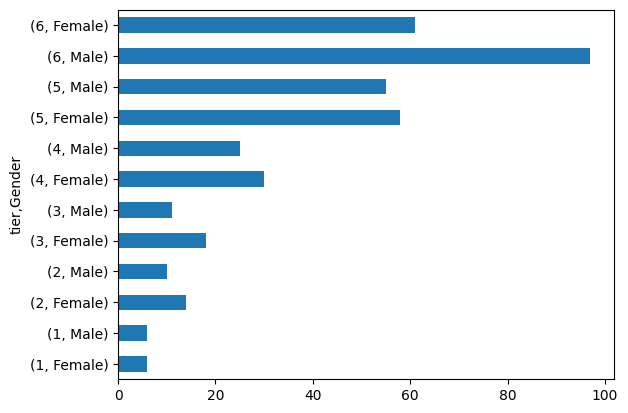

In [336]:
#Plot gender distribution in groupings by tier
# Tier 6 Males are disproportionately larger than respective tier Females. Else, all other tiers are ~balanced
combined_df.groupby('tier').Gender.value_counts().plot.barh()

<Axes: xlabel='Gender', ylabel='overall_ranking'>

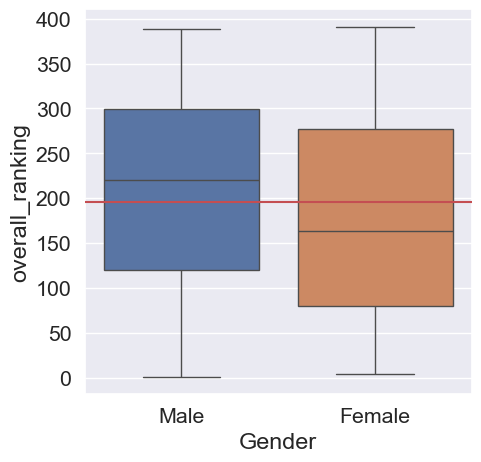

In [407]:
plt.figure(figsize=(5,5))
plt.axhline(overall_mean, color='r',zorder=3)
colors= {'Male': 'blue', 'Female': 'orange'}
sns.boxplot(x='Gender',y='overall_ranking',data=combined_df, hue='Gender')

###### Female villagers generally outperform males

In [338]:
pd.pivot_table(combined_df, index='tier', columns='Gender',aggfunc='count',values='Hobby')

Gender,Female,Male
tier,,
1,6,6
2,14,10
3,18,11
4,30,25
5,58,55
6,61,97


### 2. Species

In [406]:
species_ranking = (combined_df.groupby('Species').mean(numeric_only=True)['overall_ranking'].to_frame
().sort_values('overall_ranking').reset_index())

###### Octopus, deer, wolves perform the best, while gorilla, pig, mouse comes in last

<Axes: xlabel='Species', ylabel='overall_ranking'>

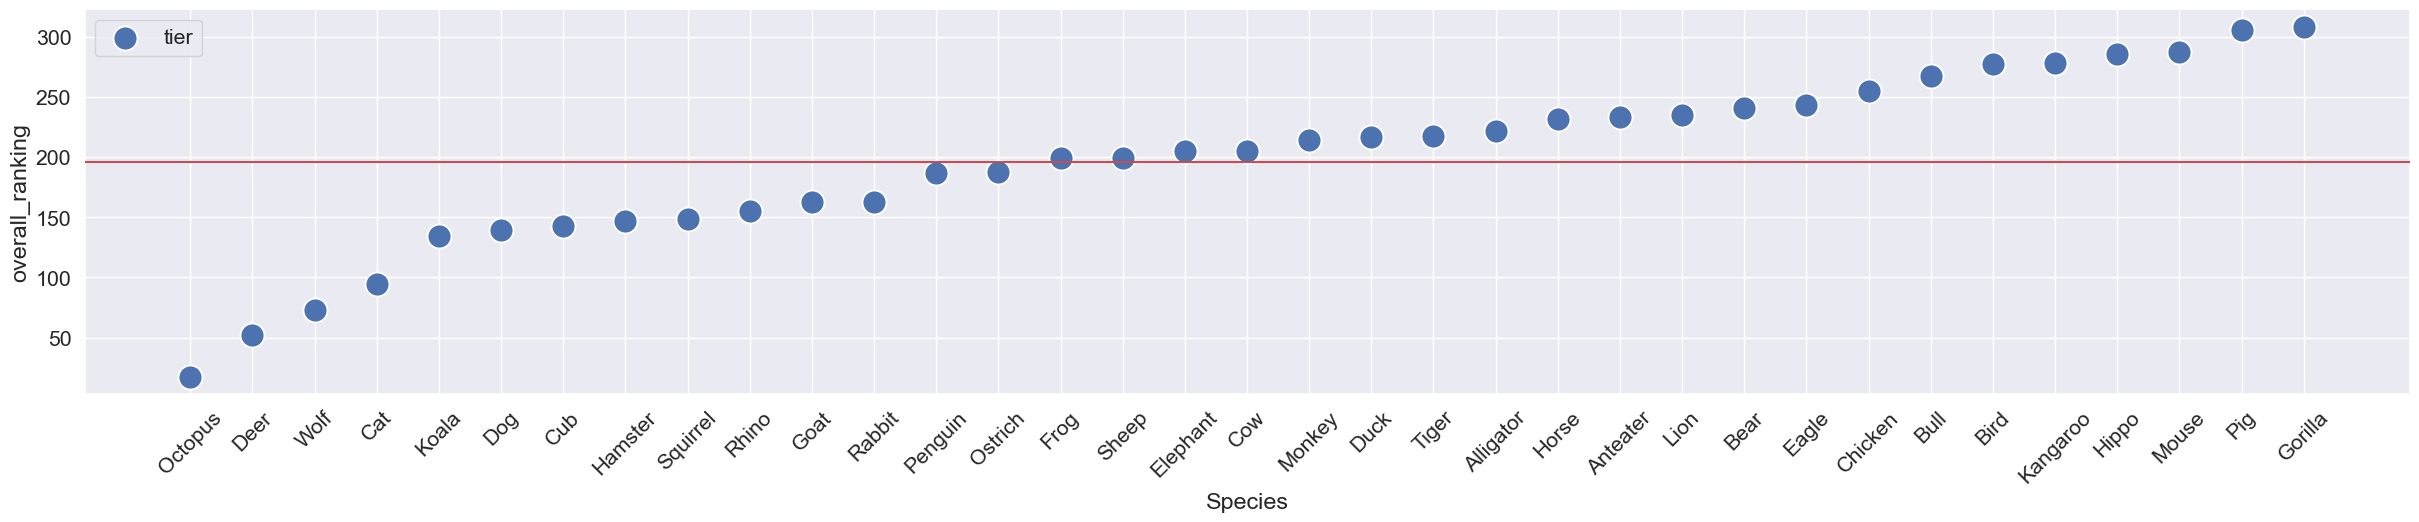

In [363]:
plt.figure(figsize=(30,5))
sns.set(font_scale=1.4)
plt.xticks(rotation=45)
plt.axhline(overall_mean, color='r',zorder=3)
sns.scatterplot(x='Species',y='overall_ranking',data=species_ranking, s=300, label='tier')

<Axes: xlabel='Species', ylabel='overall_ranking'>

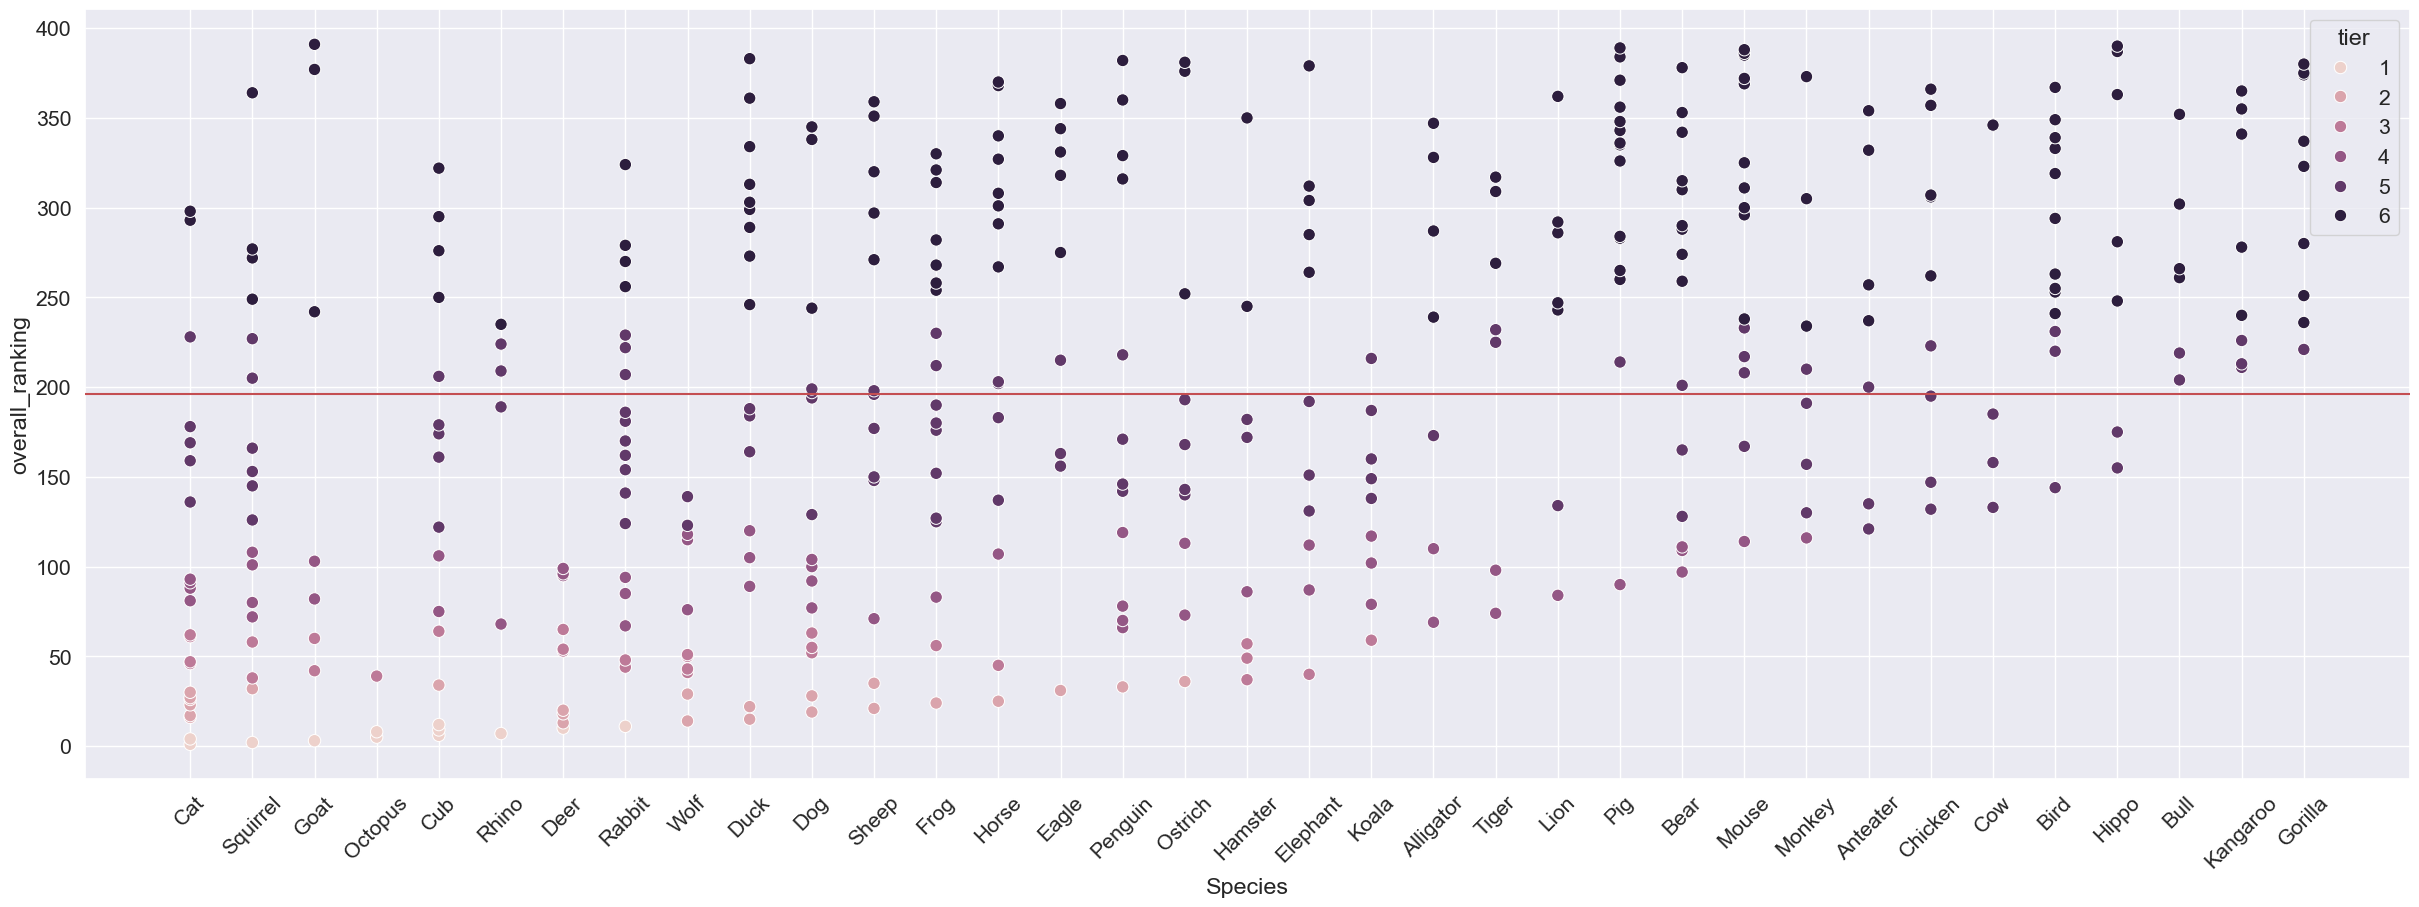

In [365]:
# Next plot shows a tier makeup and individual ranking within each species
plt.figure(figsize=(30,10))
sns.set(font_scale=1.4)
plt.xticks(rotation=45)
plt.axhline(overall_mean, color='r',zorder=3)
sns.scatterplot(x='Species',y='overall_ranking',hue='tier',data=combined_df, s=80)

###### Although octopus is most highly ranked, this is because the species has few individuals and skewed heavily by this. There appears to be a clear dislike of certain villager species, such as gorilla or kangaroo as they display overall ranking entirely below the popularity threshold of 200.

### 3. Personality

In [368]:
combined_df.Personality.value_counts()

Lazy          60
Normal        59
Snooty        55
Jock          55
Cranky        55
Peppy         49
Smug          34
Big Sister    24
Name: Personality, dtype: int64

In [405]:
personality_ranking = (combined_df.groupby('Personality').mean(numeric_only=True)['overall_ranking']
                       .to_frame().sort_values('overall_ranking').reset_index())

<Axes: xlabel='Personality', ylabel='overall_ranking'>

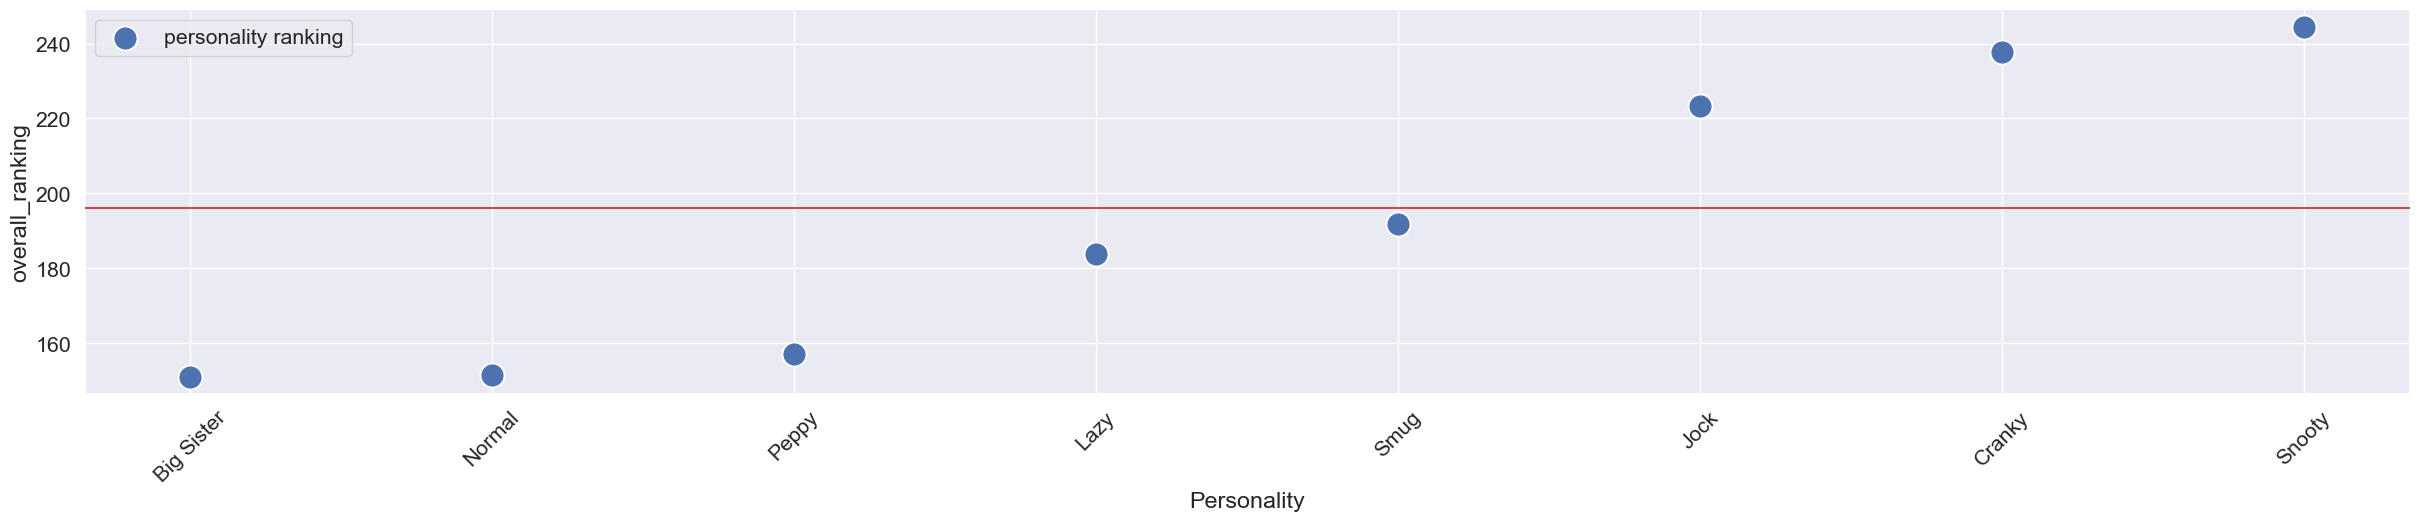

In [382]:
#Plot same as for species
plt.figure(figsize=(30,5))
sns.set(font_scale=1.4)
plt.xticks(rotation=45)
plt.axhline(overall_mean, color='r',zorder=3)
sns.scatterplot(x='Personality',y='overall_ranking',data=personality_ranking, s=300, label='personality ranking')

###### Playerbase has preference for Big Sister, Normal, and Peppy personality types (PTs) and an adversion towards Jock, Cranky, and Snooty PTs. Players show no strong feelings towards Lazy and Smug.

<Axes: xlabel='Personality', ylabel='overall_ranking'>

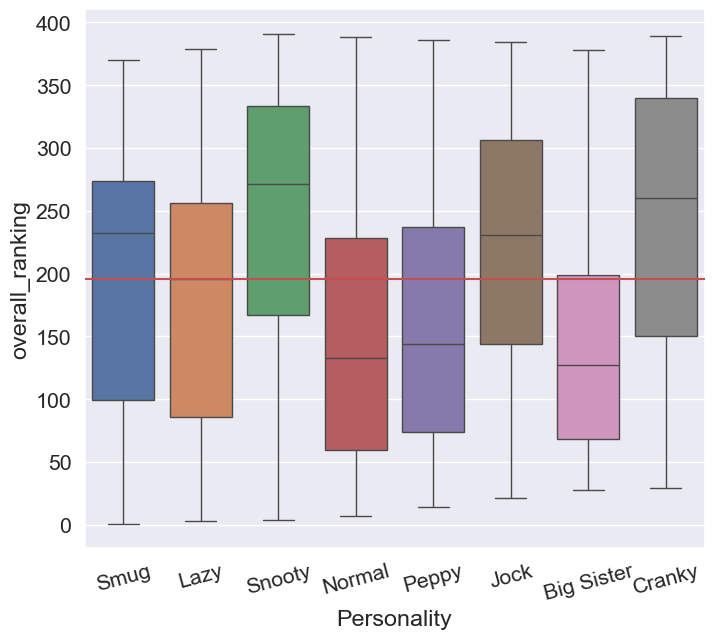

In [399]:
plt.figure(figsize=(8,7))
plt.xticks(rotation=15)
plt.axhline(overall_mean, color='r',zorder=4)
sns.boxplot(x='Personality',y='overall_ranking', hue='Personality',data=combined_df)

###### Normal, Peppy, and Big Sister are ranked best. PTs are generally normally distributed with the exception of Smug-- positively skewed. Snooty and Cranky show clear unfavorability among playerbase.

In [401]:
pd.pivot_table(combined_df, index='tier', columns='Personality',aggfunc='count',values='Color 1')

Personality,Big Sister,Cranky,Jock,Lazy,Normal,Peppy,Smug,Snooty
tier,,,,,,,,
1,NaN,NaN,NaN,4.0,4.0,NaN,2.0,2.0
2,1.0,2.0,2.0,4.0,6.0,6.0,2.0,1.0
3,5.0,4.0,3.0,2.0,8.0,4.0,2.0,1.0
4,6.0,5.0,5.0,9.0,8.0,10.0,6.0,6.0
5,8.0,13.0,18.0,19.0,19.0,16.0,5.0,15.0
6,4.0,31.0,27.0,22.0,14.0,13.0,17.0,30.0


###### Higher tiers clearly show a larger number of unlikable PTs, such as Jock, Snooty, and Cranky. Lower tiers have a larger proportion of likable PTs; for example, they have more Normal and Peppy.

### 4. Style

In [420]:
#Creates a count of and averages both style attributes. Stored as style_ranking
style_ranking = style1_ranking.copy()
style1_ranking = (combined_df.groupby('Style 1').mean(numeric_only=True)['overall_ranking']
                       .to_frame().sort_values('overall_ranking').reset_index())
style2_ranking = (combined_df.groupby('Style 2').mean(numeric_only=True)['overall_ranking']
                       .to_frame().sort_values('overall_ranking').reset_index())
style_avg = (style1_ranking['overall_ranking'] + style2_ranking['overall_ranking']) / 2
style_ranking['overall_ranking'] = style_avg

<Axes: xlabel='Style 1', ylabel='overall_ranking'>

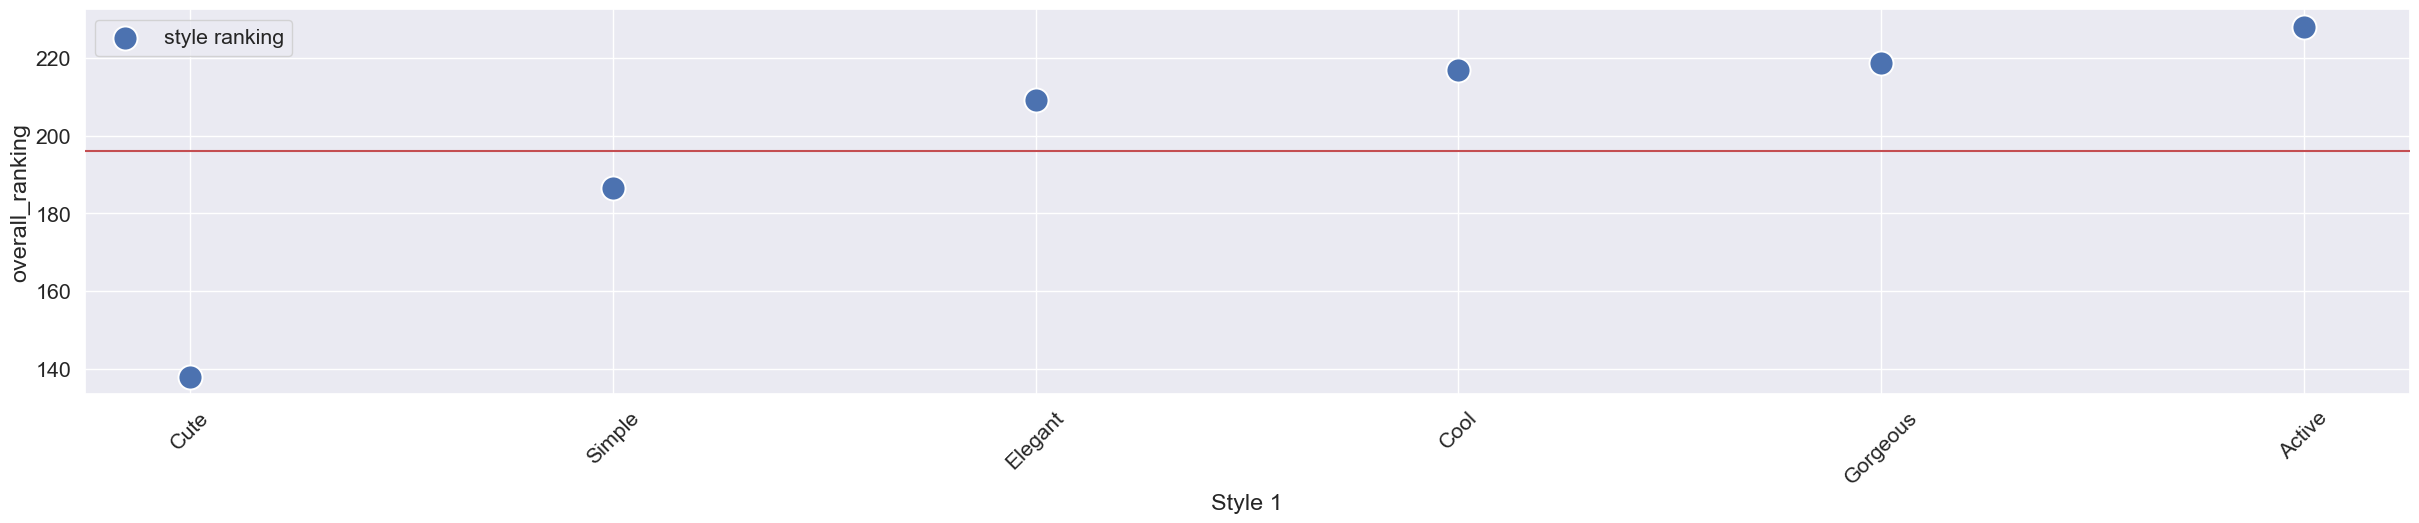

In [419]:
plt.figure(figsize=(30,5))
sns.set(font_scale=1.4)
plt.xticks(rotation=45)
plt.axhline(overall_mean, color='r',zorder=3)
sns.scatterplot(x='Style 1',y='overall_ranking',data=style_ranking, s=300, label='style ranking')

###### Villagers who were cute were the most popular, while being Cool, Gorgeous, and Active made them somewhat unlikable. Being Simple or Elegant was ranked close to the overall mean.

<Axes: xlabel='Style 1', ylabel='overall_ranking'>

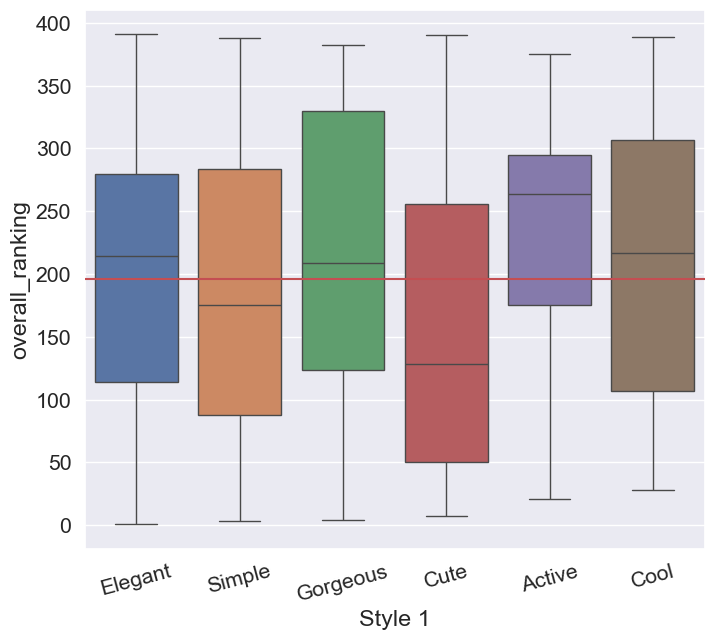

In [422]:
plt.figure(figsize=(8,7))
plt.xticks(rotation=15)
plt.axhline(overall_mean, color='r',zorder=4)
sns.boxplot(x='Style 1',y='overall_ranking', hue='Style 1',data=combined_df)

<Axes: xlabel='Style 2', ylabel='overall_ranking'>

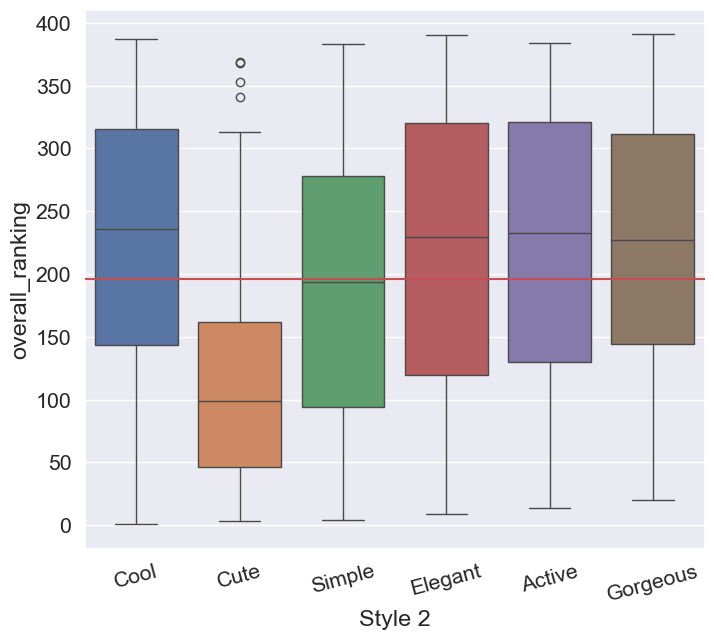

In [423]:
plt.figure(figsize=(8,7))
plt.xticks(rotation=15)
plt.axhline(overall_mean, color='r',zorder=4)
sns.boxplot(x='Style 2',y='overall_ranking', hue='Style 2',data=combined_df)

###### Strong preference was given to cute villagers. Both styles and their categories appear to be normally distributed with the exception of Active in Style 1, which is positively skewed and the mean is ranked significantly above the overall mean.

In [425]:
pd.pivot_table(combined_df, index='tier', columns='Style 1', values='Catchphrase', aggfunc='count')

Style 1,Active,Cool,Cute,Elegant,Gorgeous,Simple
tier,,,,,,
1,NaN,NaN,3.0,2.0,1.0,6.0
2,2.0,2.0,8.0,1.0,2.0,9.0
3,3.0,7.0,8.0,5.0,NaN,6.0
4,2.0,11.0,11.0,7.0,6.0,18.0
5,15.0,17.0,14.0,17.0,11.0,39.0
6,28.0,31.0,19.0,22.0,18.0,40.0


In [426]:
pd.pivot_table(combined_df, index='tier', columns='Style 2', values='Catchphrase', aggfunc='count')

Style 2,Active,Cool,Cute,Elegant,Gorgeous,Simple
tier,,,,,,
1,NaN,2.0,7.0,1.0,NaN,2.0
2,2.0,2.0,6.0,2.0,1.0,11.0
3,2.0,3.0,10.0,3.0,2.0,9.0
4,8.0,7.0,13.0,8.0,8.0,11.0
5,13.0,15.0,18.0,15.0,18.0,34.0
6,25.0,30.0,8.0,27.0,25.0,43.0


## Conclusion

###### Several conclusions are drawn: 
###### 1. Females rank slightly better than males. This trend is due in part by the larger number of males found in tier 6 
###### 2. Octopus, Deer, Wolf are ranked the best. Note that octopus has very few members compared to all other species.
###### 3. Big Sister, Peppy, and Normal were the highest ranked personality types.
###### 4. The Cute style showed clear correlation with a higher ranking.